In [1]:
import copy
import sys
sys.path.append('../utils/')
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style("white")
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.filters.filtertools import recursive_filter

## Import custom modules
# Primary module with most model functions
import model
# Module for FC regression
import multregressionconnectivity as mreg

In [2]:
T = np.arange(0,500,1)

In [3]:
tasktiming = np.zeros((1,len(T)))
for t in range(len(T)):
    if t%25>10 and t%25<21:
        tasktiming[0,t] = 1.0

(0, 100)

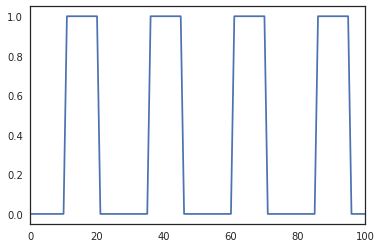

In [4]:
plt.plot(T, tasktiming[0])
#plt.ylim(top = 1.2, bottom = -0.1)
plt.xlim(0,100)

In [5]:
x = copy.copy(tasktiming[0])

In [11]:
def make_y(x, phi, rho, mu=0, sigma=1):
    y = y = np.zeros(len(x))
    
    noise = np.random.normal(mu, sigma, len(y))
    
    for i in range(len(y)):
        if i == 0:
            y[i] = copy.copy(x[i])
        else:
            noise[i] = rho*noise[i-1]+noise[i]
            y[i] = phi*y[i-1]+(1-phi)*x[i]+noise[i]
            
    return(y)

In [49]:
phi_no_r = 0
rho_no_ac = 0

phi_

y_no_r_no_ac = make_y(x, rho=rho_no_ac, phi = phi_no_r)

In [59]:
X = x.reshape(-1,1)
## Constant/GLM:
#X = sm.add_constant(X)
y_lag = np.r_[0, y_no_r_no_ac[:-1]]
y_lag = y_lag.reshape(-1,1)
X = np.concatenate((X, y_lag), 1)

#No intercept model
mod = sm.OLS(y_no_r_no_ac, X)
res = mod.fit()
est_phi = res.params[1]
print("Actual phi = %s; estimated phi = %s"%(phi_no_r,str(round(est_phi, 5))))

Actual phi = 0; estimated phi = 0.02412


In [58]:
errors = res.resid

errors_lag = np.r_[0, errors[:-1]]
errors_X = errors_lag.reshape(-1,1)

#No intercept model
error_mod = sm.OLS(errors, errors_X)
error_res = error_mod.fit()
est_rho = error_res.params[0]
print("Actual rho = %s; estimated rho = %s"%(rho_no_ac, str(round(est_rho, 5))))

Actual rho = 0; estimated rho = -0.00046


In [ ]:
def prewhiten(y, p=1, q=0):
    mod1 = ARMA(taskdata_short_pw[region,:], order=(p,q))
    res1 = mod1.fit()
    out = {'y_pw': res1.resid,
          'ar': res1.params[1]}
    return(out)
    

In [ ]:
def get_phi_rho(x, y, phi_stim, rho_stim, mu_stim=0, sigma_stim=1, verbose = True):

In [ ]:
def sim_rec_ac(x, y, phi_stim, rho_stim, mu_stim=0, sigma_stim=1, prewhiten = True, verbose = False):
    #calls make_y(x, phi)
    
    if prewhiten:
        y_pw = prewhiten(y)
        get_phi_rho()

Create predicted versus actual gradient/heat map

For 
10 values of phi  
10 values of rho  
plot absolute diff between predicted and actual parameter estimate  
separately for sans prewhitening and with prewhitening  